# Applying a discrete-time, non-stationary nucleotide model

We fit a discrete-time Markov nucleotide model. This corresponds to a Barry and Hartigan 1987 model.

In [1]:
from cogent3.app import io, evo

loader = io.load_aligned(format="fasta", moltype="dna")
aln = loader("../data/primate_brca1.fasta")
model = evo.model("BH", tree="../data/primate_brca1.tree")
result = model(aln)
result

,-6941.4684,135,True,


**NOTE:** DLC stands for diagonal largest in column and the value is a check on the identifiability of the model. `unique_Q` is not applicable to a discrete-time model and so remains as `None`.

Looking at the likelihood function, you will

In [2]:
result.lf

## Get a tree with branch lengths as paralinear

This is the only possible length metric for a discrete-time process.

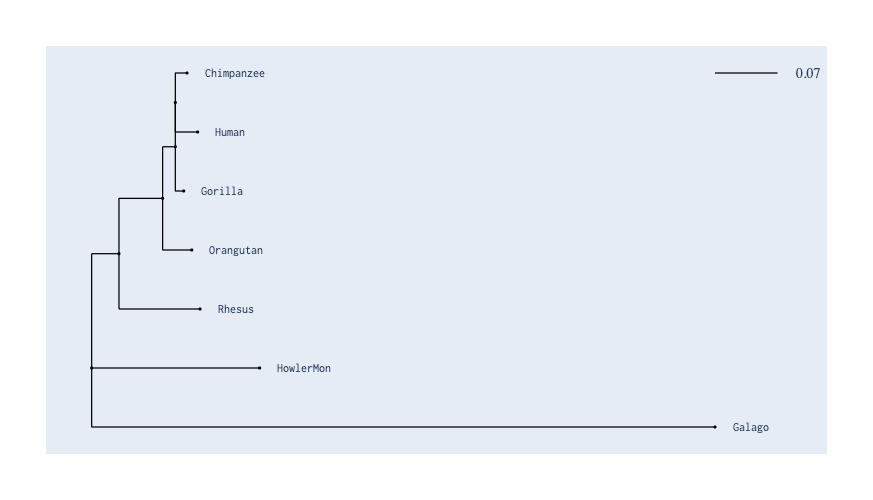

In [3]:
tree = result.tree
fig = tree.get_figure()
fig.scale_bar = "top right"
fig.show(width=500, height=500)

## Getting parameter estimates

For a discrete-time model, aside from the root motif probabilities, everything is edge specific. But note that the `tabular_result` has different keys from the continuous-time case, as demonstrated below.

In [4]:
tabulator = evo.tabulate_stats()
stats = tabulator(result)
stats

2x tabular_result('edge motif motif2 params': Table, 'motif params': Table)

In [5]:
stats['edge motif motif2 params']

Galago,T,T,0.8751
Galago,T,C,0.0649
Galago,T,A,0.0409
Galago,T,G,0.0192
Galago,C,T,0.1126
...,...,...,...
edge.3,A,G,0.0055
edge.3,G,T,0.0000
edge.3,G,C,0.0011
edge.3,G,A,0.0039
edge.3,G,G,0.9950
